In [101]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

## TRAINING DATASET

In [102]:
df = pd.read_csv(r"C:\Users\abhir\Downloads\train.csv")

## Deleting unnecessary columns

In [103]:
df = df.drop(columns = 'Loan_ID')

## Descriptive Statistics and information

In [104]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [106]:
categorical_features = df.select_dtypes(include=['object']).columns
num_categorical_features = len(categorical_features)
print("Categorical Feature Name ", categorical_features)
print("Count ", num_categorical_features)

Categorical Feature Name  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')
Count  7


In [107]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [108]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Exploratory Data Analysis(EDA)

<Axes: >

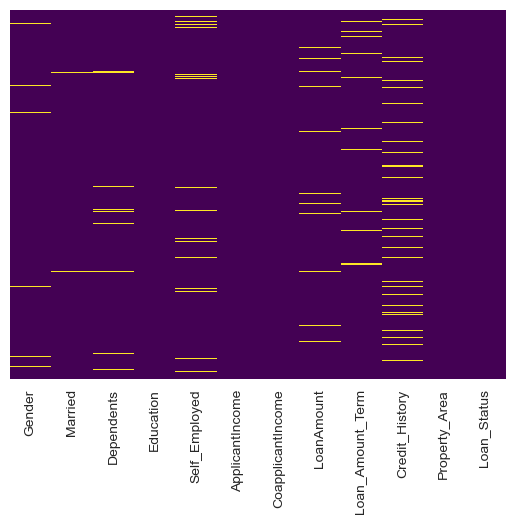

In [109]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

<Axes: xlabel='Loan_Status', ylabel='count'>

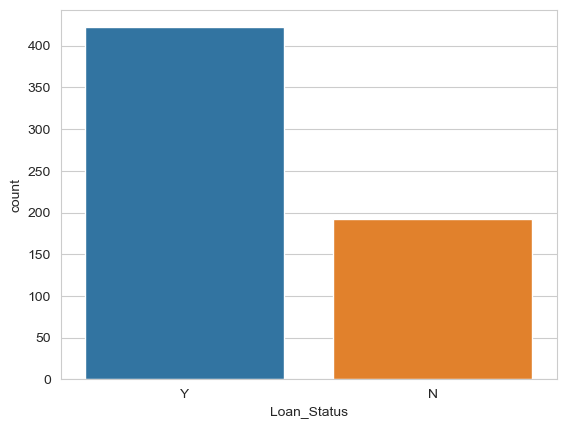

In [110]:
sns.set_style('whitegrid')
sns.countplot(x = 'Loan_Status', data = df)

<Axes: xlabel='Loan_Status', ylabel='count'>

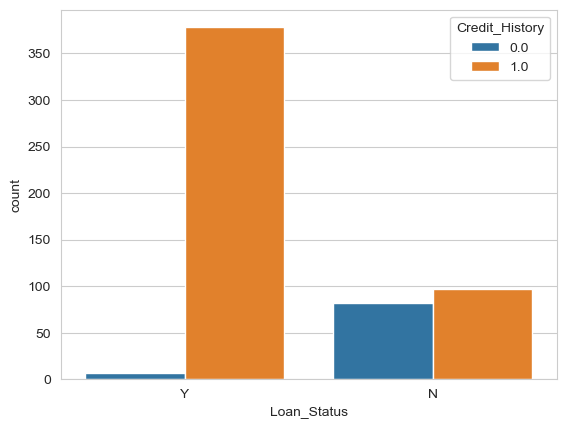

In [111]:
sns.set_style('whitegrid')
sns.countplot(x = 'Loan_Status', hue = 'Credit_History',data = df)

<Axes: xlabel='Loan_Status', ylabel='count'>

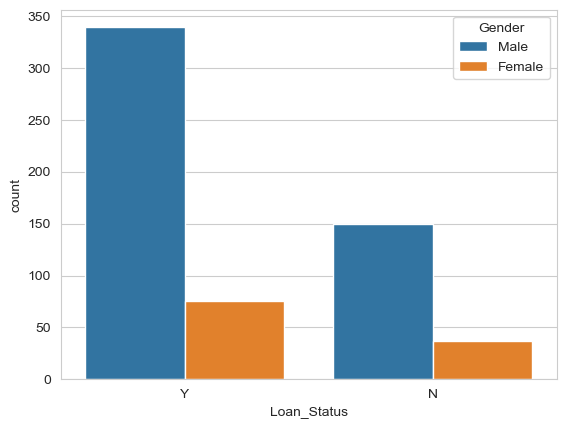

In [112]:
sns.set_style('whitegrid')
sns.countplot(x = 'Loan_Status', hue = 'Gender', data = df)

<Axes: xlabel='Loan_Status', ylabel='count'>

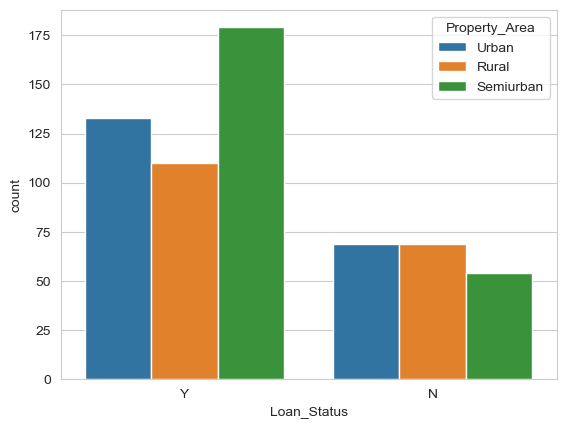

In [113]:
sns.set_style('whitegrid')
sns.countplot(x = 'Loan_Status', hue = 'Property_Area', data = df)

<Axes: xlabel='Loan_Status', ylabel='count'>

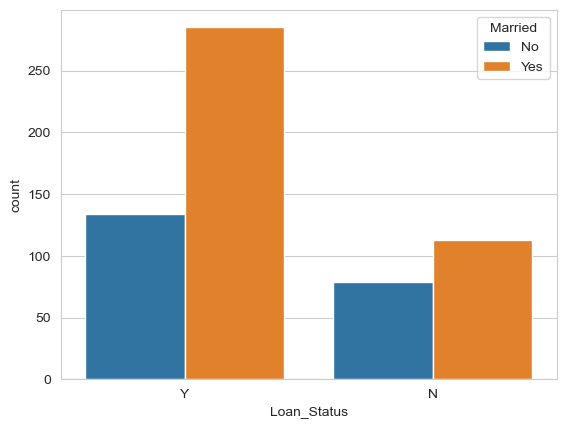

In [114]:
sns.set_style('whitegrid')
sns.countplot(x = 'Loan_Status', hue = 'Married', data = df)

<Axes: xlabel='Loan_Status', ylabel='count'>

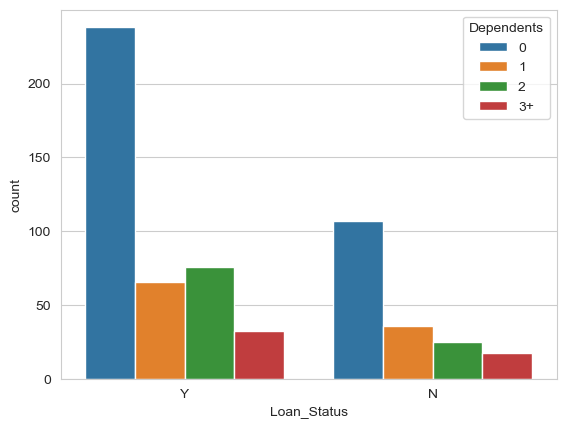

In [115]:
sns.set_style('whitegrid')
sns.countplot(x = 'Loan_Status', hue = 'Dependents', data = df)

<Axes: xlabel='Loan_Status', ylabel='count'>

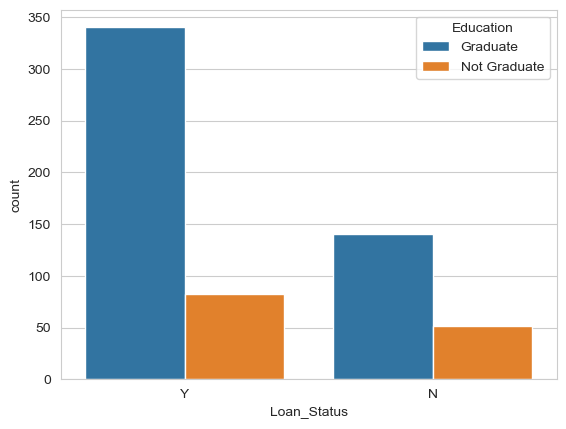

In [116]:
sns.set_style('whitegrid')
sns.countplot(x = 'Loan_Status', hue = 'Education', data = df)

<Axes: xlabel='Loan_Status', ylabel='count'>

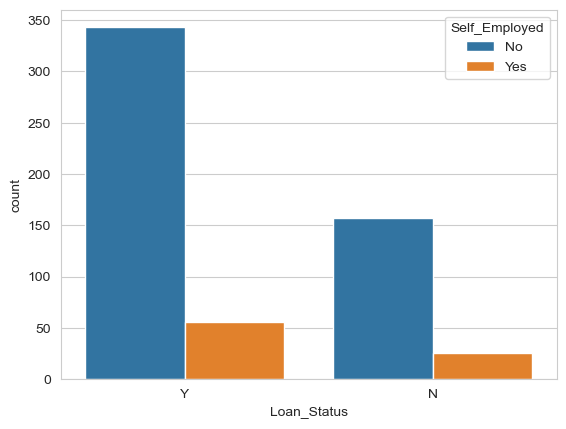

In [117]:
sns.set_style('whitegrid')
sns.countplot(x = 'Loan_Status', hue = 'Self_Employed', data = df)

C:\Users\abhir\AppData\Local\Temp\ipykernel_18860\3771125287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'].dropna(), kde = False, color = "darkred", bins = 40)


<Axes: xlabel='LoanAmount'>

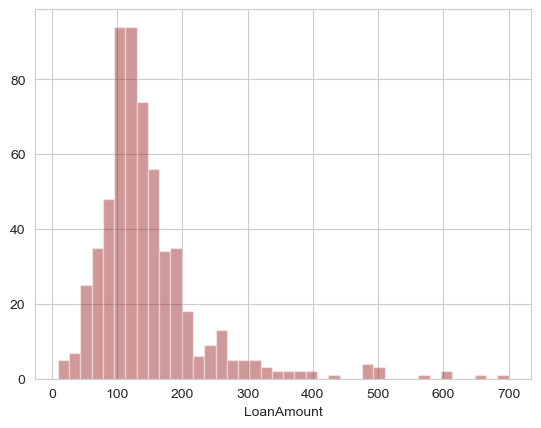

In [118]:
sns.distplot(df['LoanAmount'].dropna(), kde = False, color = "darkred", bins = 40)

C:\Users\abhir\AppData\Local\Temp\ipykernel_18860\3641526054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'].dropna(), kde = False, color = "darkred", bins = 40)


<Axes: xlabel='ApplicantIncome'>

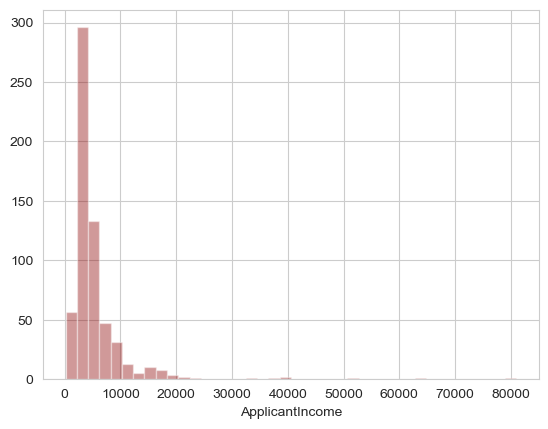

In [119]:
sns.distplot(df['ApplicantIncome'].dropna(), kde = False, color = "darkred", bins = 40)

C:\Users\abhir\AppData\Local\Temp\ipykernel_18860\381109882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'].dropna(), kde = False, color = "darkred", bins = 40)


<Axes: xlabel='CoapplicantIncome'>

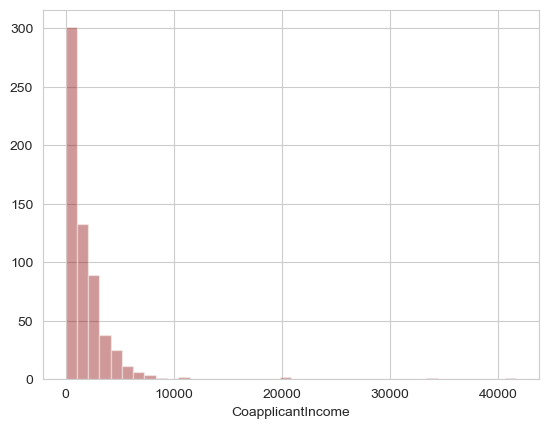

In [120]:
sns.distplot(df['CoapplicantIncome'].dropna(), kde = False, color = "darkred", bins = 40)

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

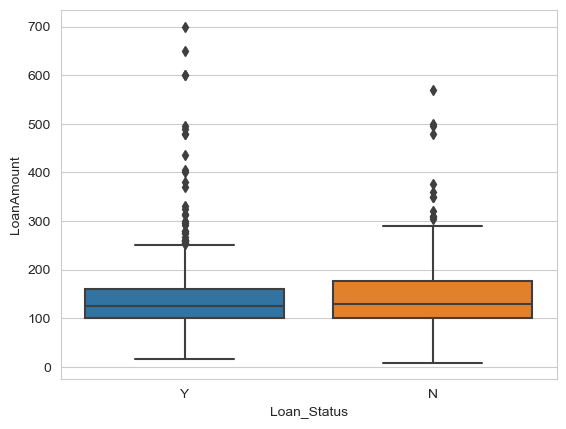

In [121]:
sns.boxplot(x ='Loan_Status', y = 'LoanAmount', data = df)

C:\Users\abhir\AppData\Local\Temp\ipykernel_18860\722589411.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term'].dropna(), kde = False, color = "darkred", bins = 40)


<Axes: xlabel='Loan_Amount_Term'>

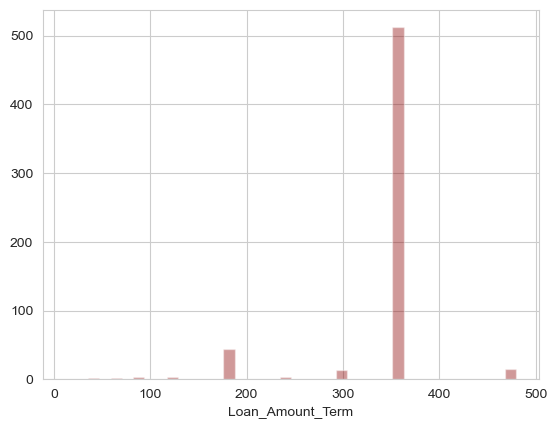

In [122]:
sns.distplot(df['Loan_Amount_Term'].dropna(), kde = False, color = "darkred", bins = 40)

In [123]:
gender = pd.get_dummies(df["Gender"], drop_first = True, dtype = int)
education = pd.get_dummies(df["Education"], drop_first = True, dtype = int)
married = pd.get_dummies(df["Married"], drop_first = True, dtype = int)
self_employed = pd.get_dummies(df["Self_Employed"], drop_first = True, dtype = int)
property_Area = pd.get_dummies(df["Property_Area"], drop_first = True, dtype = int)
loan_status = pd.get_dummies(df["Loan_Status"], drop_first = True, dtype = int)

In [124]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [125]:
df.drop(["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"], axis = 1, inplace = True)

In [126]:
df = pd.concat([df, gender, married, education, self_employed, property_Area, loan_status], axis = 1)

In [127]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
0,0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [128]:
if not df["Dependents"].isnull().all():
    df.loc[df["Dependents"] == '3+', "Dependents"] = 3
    df["Dependents"] = df["Dependents"].fillna(-1).astype(int)

In [129]:
dependents_counts = df["Dependents"].value_counts()
print(dependents_counts)

Dependents
 0    345
 1    102
 2    101
 3     51
-1     15
Name: count, dtype: int64


In [130]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
count,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.719870,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.796417,0.648208,0.218241,0.133550,0.379479,0.328990,0.687296
std,1.039056,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.402991,0.477919,0.413389,0.340446,0.485653,0.470229,0.463973
min,-1.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
df.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
Dependents,1.000000,0.115686,0.033955,0.166324,-0.103982,-0.025316,0.144084,0.336694,0.051414,0.055204,0.000874,-0.008059,0.014263
ApplicantIncome,0.115686,1.000000,-0.116605,0.570909,-0.045306,-0.014715,0.013933,0.050194,-0.140760,0.127180,-0.014246,-0.000598,-0.004710
CoapplicantIncome,0.033955,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.082316,0.080496,-0.062290,-0.016100,-0.027044,0.022776,-0.059187
LoanAmount,0.166324,0.570909,0.188619,1.000000,0.039447,-0.008433,0.065501,0.148367,-0.171133,0.117421,-0.008401,-0.034003,-0.037318
Loan_Amount_Term,-0.103982,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.071026,-0.104608,-0.078784,-0.034361,0.061957,-0.098112,-0.021268
Credit_History,-0.025316,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.026349,0.001259,-0.081822,-0.002362,0.042414,-0.023721,0.561678
Male,0.144084,0.013933,0.082316,0.065501,-0.071026,0.026349,1.000000,0.339026,0.061497,-0.027421,-0.113069,0.044109,0.025407
Yes,0.336694,0.050194,0.080496,0.148367,-0.104608,0.001259,0.339026,1.000000,0.017671,0.008491,-0.000229,0.000449,0.084281
Not Graduate,0.051414,-0.140760,-0.062290,-0.171133,-0.078784,-0.081822,0.061497,0.017671,1.000000,-0.010383,-0.039410,-0.034279,-0.085884
Yes,0.055204,0.127180,-0.016100,0.117421,-0.034361,-0.002362,-0.027421,0.008491,-0.010383,1.000000,0.008710,-0.030338,-0.003700


<Axes: >

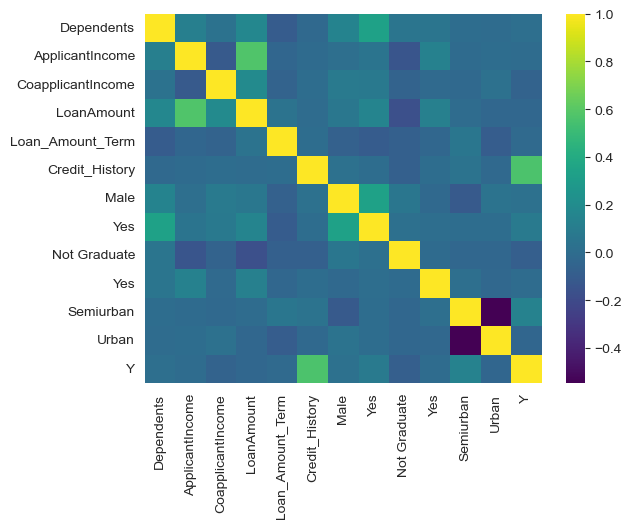

In [132]:
sns.heatmap(df.corr(), cmap = "viridis")

## Handling Missing Values

In [133]:
gender_counts = df["Male"].value_counts()
print(gender_counts)

Male
1    489
0    125
Name: count, dtype: int64


<Axes: xlabel='Male', ylabel='count'>

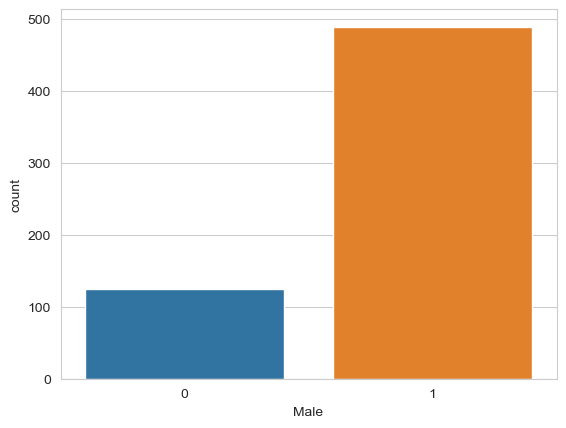

In [134]:
sns.set_style('whitegrid')
sns.countplot(x = 'Male', data = df)

### SInce number of males dominate the number of females in the dataset, we can impute missing values simply by using mode of the distribution

In [135]:
mode_male = df["Male"].mode().iloc[0]
print(mode_male)

1


In [136]:
def impute_gender(cols):
    Male = cols[0]
    if pd.isnull(Male):
        return 1
    else:
        return Male

In [137]:
df.isnull().sum()

Dependents            0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Male                  0
Yes                   0
Not Graduate          0
Yes                   0
Semiurban             0
Urban                 0
Y                     0
dtype: int64

### We can use the same technique to impute Credit_History.

In [138]:
credit_counts = df["Credit_History"].value_counts()
print(credit_counts)

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


In [139]:
def impute_Credit(cols):
    Credit_History = cols[0]
    if pd.isnull(Credit_History):
        return 1
    else:
        return Credit_History

In [140]:
df["Credit_History"] = df[["Credit_History"]].apply(impute_Credit, axis = 1)

<Axes: >

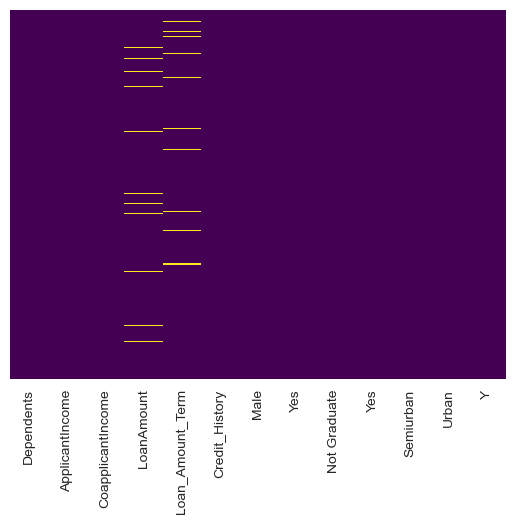

In [141]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = "viridis")

In [142]:
LoanAmount_Median = df["LoanAmount"].median()
print(LoanAmount_Median)

128.0


In [143]:
def impute_LoanAmount(cols):
    LoanAmount = cols[0]
    if pd.isnull(LoanAmount):
        return 128
    else:
        return LoanAmount

In [144]:
df["LoanAmount"] = df[["LoanAmount"]].apply(impute_LoanAmount, axis = 1)

<Axes: >

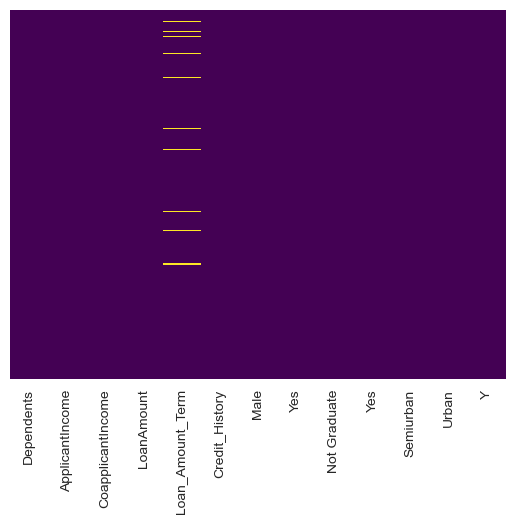

In [145]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = "viridis")

In [146]:
df.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
Dependents,1.000000,0.115686,0.033955,0.163360,-0.103982,-0.026431,0.144084,0.336694,0.051414,0.055204,0.000874,-0.008059,0.014263
ApplicantIncome,0.115686,1.000000,-0.116605,0.565181,-0.045306,-0.018615,0.013933,0.050194,-0.140760,0.127180,-0.014246,-0.000598,-0.004710
CoapplicantIncome,0.033955,-0.116605,1.000000,0.189218,-0.059878,0.011134,0.082316,0.080496,-0.062290,-0.016100,-0.027044,0.022776,-0.059187
LoanAmount,0.163360,0.565181,0.189218,1.000000,0.039358,-0.000607,0.063245,0.145717,-0.168759,0.115100,-0.005804,-0.036050,-0.033214
Loan_Amount_Term,-0.103982,-0.045306,-0.059878,0.039358,1.000000,0.000445,-0.071026,-0.104608,-0.078784,-0.034361,0.061957,-0.098112,-0.021268
Credit_History,-0.026431,-0.018615,0.011134,-0.000607,0.000445,1.000000,0.021612,0.006690,-0.073658,-0.001550,0.035976,-0.016934,0.540556
Male,0.144084,0.013933,0.082316,0.063245,-0.071026,0.021612,1.000000,0.339026,0.061497,-0.027421,-0.113069,0.044109,0.025407
Yes,0.336694,0.050194,0.080496,0.145717,-0.104608,0.006690,0.339026,1.000000,0.017671,0.008491,-0.000229,0.000449,0.084281
Not Graduate,0.051414,-0.140760,-0.062290,-0.168759,-0.078784,-0.073658,0.061497,0.017671,1.000000,-0.010383,-0.039410,-0.034279,-0.085884
Yes,0.055204,0.127180,-0.016100,0.115100,-0.034361,-0.001550,-0.027421,0.008491,-0.010383,1.000000,0.008710,-0.030338,-0.003700


In [147]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban,Y
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [148]:
LoanAmountTerm_Median = df["Loan_Amount_Term"].median()
print(LoanAmountTerm_Median)
def impute_LoanAmountTerm(cols):
    Loan_Amount_Term = cols[0]
    if pd.isnull(Loan_Amount_Term):
        return 360
    else:
        return Loan_Amount_Term
df["Loan_Amount_Term"] = df[["Loan_Amount_Term"]].apply(impute_LoanAmountTerm, axis = 1)

360.0


In [149]:
df.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Male                 0
Yes                  0
Not Graduate         0
Yes                  0
Semiurban            0
Urban                0
Y                    0
dtype: int64

<Axes: >

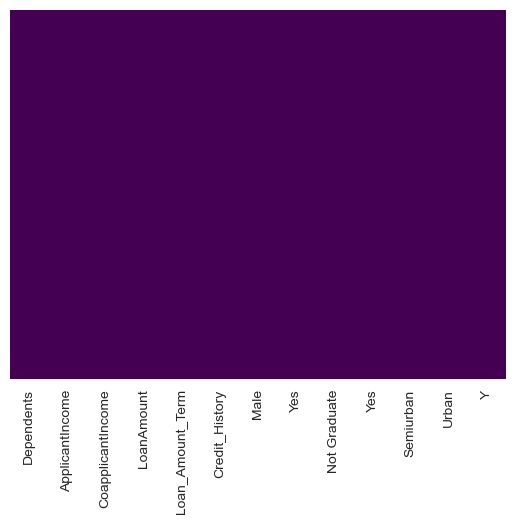

In [150]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = "viridis")

In [151]:
df.rename(columns={'S_employed': 'Yes'}, inplace=True)

In [152]:
def df_column_uniquify(df):
    df_columns = df.columns
    new_columns = []
    for item in df_columns:
        counter = 0
        newitem = item
        while newitem in new_columns:
            counter += 1
            newitem = "{}_{}".format(item, counter)
        new_columns.append(newitem)
    df.columns = new_columns
    return df

In [153]:
df = df_column_uniquify(df)

In [154]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes_1,Semiurban,Urban,Y
0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


## TESTING DATASET

In [155]:
df1 = pd.read_csv(r"C:\Users\abhir\Downloads\test.csv")

In [156]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [157]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Deleting unnecessary columns

In [158]:
df1 = df1.drop(columns = 'Loan_ID')

In [159]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [160]:
df1.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<Axes: >

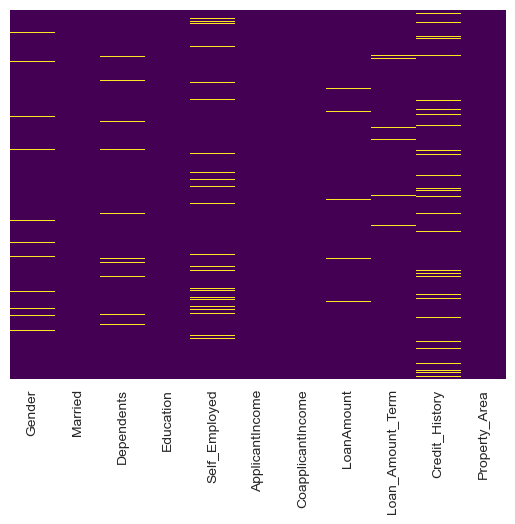

In [161]:
sns.heatmap(df1.isnull(),yticklabels = False, cbar = False, cmap = "viridis")

In [162]:
gender1 = pd.get_dummies(df1["Gender"], drop_first = True, dtype = int)
education1 = pd.get_dummies(df1["Education"], drop_first = True, dtype = int)
married1 = pd.get_dummies(df1["Married"], drop_first = True, dtype = int)
self_employed1 = pd.get_dummies(df1["Self_Employed"], drop_first = True, dtype = int)
property_Area1 = pd.get_dummies(df1["Property_Area"], drop_first = True, dtype = int)

In [163]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [164]:
df1.drop(["Gender", "Married", "Education", "Self_Employed", "Property_Area"], axis = 1, inplace = True)

In [165]:
df1 = pd.concat([df1, gender1, married1, education1, self_employed1, property_Area1], axis = 1)

In [166]:
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
3,2,2340,2546,100.0,360.0,NaN,1,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1


In [167]:
df1.isnull().sum()

Dependents           10
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Male                  0
Yes                   0
Not Graduate          0
Yes                   0
Semiurban             0
Urban                 0
dtype: int64

<Axes: >

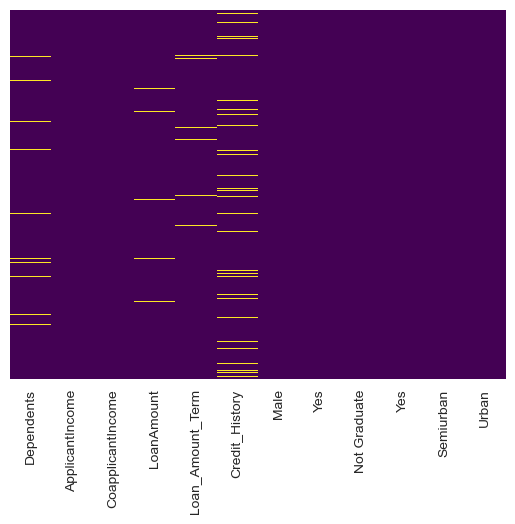

In [168]:
sns.heatmap(df1.isnull(),yticklabels = False, cbar = False, cmap = "viridis")

In [169]:
if not df1["Dependents"].isnull().all():
    df1.loc[df1["Dependents"] == '3+', "Dependents"] = 3
    df1["Dependents"] = df1["Dependents"].fillna(-1).astype(int)

In [170]:
df1.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban
Dependents,1.000000,0.131727,-0.041866,0.137756,-0.046152,-0.066817,0.108605,0.358376,0.133341,-0.023392,-0.018163,0.040416
ApplicantIncome,0.131727,1.000000,-0.110335,0.493451,0.023249,0.099553,0.048762,0.051265,-0.136369,0.073010,-0.008305,0.037363
CoapplicantIncome,-0.041866,-0.110335,1.000000,0.150850,-0.010984,-0.071235,0.081655,0.032548,-0.057318,-0.027065,-0.028628,-0.067608
LoanAmount,0.137756,0.493451,0.150850,1.000000,0.094950,-0.012578,0.088827,0.181838,-0.156346,0.077394,-0.023109,0.001179
Loan_Amount_Term,-0.046152,0.023249,-0.010984,0.094950,1.000000,-0.053593,-0.061075,0.039140,0.063804,-0.025531,-0.015516,0.019334
Credit_History,-0.066817,0.099553,-0.071235,-0.012578,-0.053593,1.000000,0.035795,0.049732,-0.040703,0.105128,-0.044997,0.075175
Male,0.108605,0.048762,0.081655,0.088827,-0.061075,0.035795,1.000000,0.306016,0.008437,0.047270,-0.090408,0.039214
Yes,0.358376,0.051265,0.032548,0.181838,0.039140,0.049732,0.306016,1.000000,0.049443,0.028374,-0.032205,0.024667
Not Graduate,0.133341,-0.136369,-0.057318,-0.156346,0.063804,-0.040703,0.008437,0.049443,1.000000,-0.010096,0.034171,-0.040639
Yes,-0.023392,0.073010,-0.027065,0.077394,-0.025531,0.105128,0.047270,0.028374,-0.010096,1.000000,-0.071918,-0.058025


<Axes: >

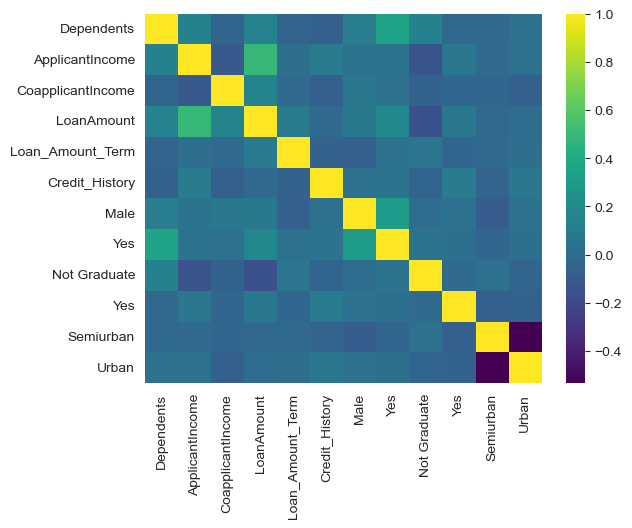

In [171]:
sns.heatmap(df1.corr(), cmap = "viridis")

## Filling Missing Values

In [172]:
credit_counts1 = df1["Credit_History"].value_counts()
print(credit_counts1)

Credit_History
1.0    279
0.0     59
Name: count, dtype: int64


In [173]:
def impute_Credit1(cols):
    Credit_History = cols[0]
    if pd.isnull(Credit_History):
        return 1
    else:
        return Credit_History

In [174]:
df1["Credit_History"] = df1[["Credit_History"]].apply(impute_Credit1, axis = 1)

In [175]:
df1.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Male                 0
Yes                  0
Not Graduate         0
Yes                  0
Semiurban            0
Urban                0
dtype: int64

In [176]:
LoanAmount_Median1 = df1["LoanAmount"].median()
print(LoanAmount_Median1)

125.0


In [177]:
def impute_LoanAmount1(cols):
    LoanAmount = cols[0]
    if pd.isnull(LoanAmount):
        return 125
    else:
        return LoanAmount

In [178]:
df1["LoanAmount"] = df1[["LoanAmount"]].apply(impute_LoanAmount1, axis = 1)

In [179]:
df1.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     6
Credit_History       0
Male                 0
Yes                  0
Not Graduate         0
Yes                  0
Semiurban            0
Urban                0
dtype: int64

In [180]:
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
3,2,2340,2546,100.0,360.0,1.0,1,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1


In [181]:
df1["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64

In [182]:
LoanAmountTerm_Median1 = df1["Loan_Amount_Term"].median()
print(LoanAmountTerm_Median1)
def impute_LoanAmountTerm1(cols):
    Loan_Amount_Term = cols[0]
    if pd.isnull(Loan_Amount_Term):
        return 360
    else:
        return Loan_Amount_Term
df1["Loan_Amount_Term"] = df1[["Loan_Amount_Term"]].apply(impute_LoanAmountTerm1, axis = 1)

360.0


In [183]:
df1.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Male                 0
Yes                  0
Not Graduate         0
Yes                  0
Semiurban            0
Urban                0
dtype: int64

<Axes: >

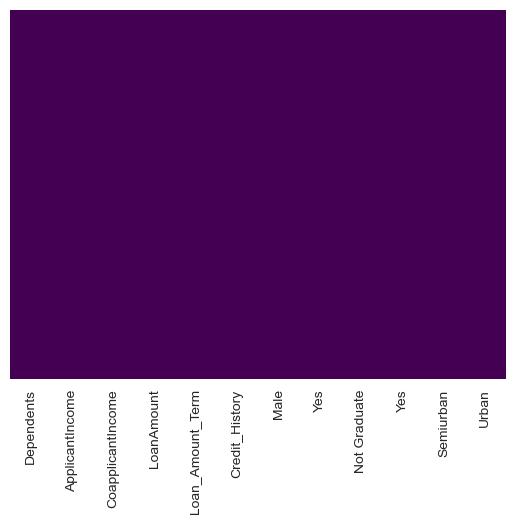

In [184]:
sns.heatmap(df1.isnull(),yticklabels = False, cbar = False, cmap = "viridis")

In [185]:
def df1_column_uniquify(df1):
    df1_columns = df1.columns
    new_columns = []
    for item in df1_columns:
        counter = 0
        newitem = item
        while newitem in new_columns:
            counter += 1
            newitem = "{}_{}".format(item, counter)
        new_columns.append(newitem)
    df1.columns = new_columns
    return df1

In [186]:
df1 = df1_column_uniquify(df1)

In [187]:
df1

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes_1,Semiurban,Urban
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
3,2,2340,2546,100.0,360.0,1.0,1,1,0,0,0,1
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,3,4009,1777,113.0,360.0,1.0,1,1,1,1,0,1
363,0,4158,709,115.0,360.0,1.0,1,1,0,0,0,1
364,0,3250,1993,126.0,360.0,1.0,1,0,0,0,1,0
365,0,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0


## Model Training

In [188]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [189]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [190]:
X_train, y_train = df.drop("Y", axis = 1), df["Y"]

In [191]:
X_test = df1

In [192]:
k_values = range(1, 11)

In [193]:
wcss = []  # Within-Cluster Sum of Squares

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_train) 
    wcss.append(kmeans_model.inertia_)

C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

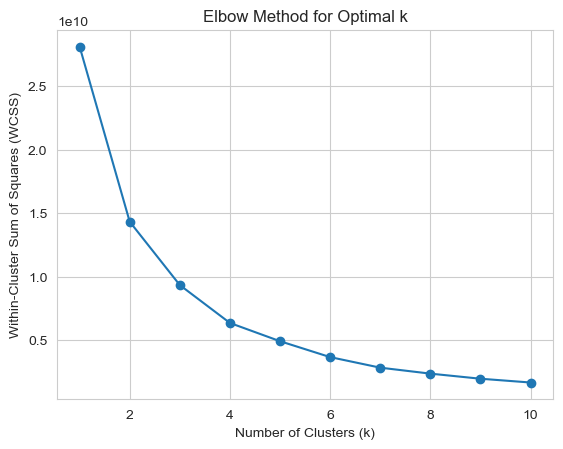

In [194]:
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [195]:
kmeans_model = KMeans(n_clusters= 5, random_state=42)
kmeans_model.fit(X_train)

C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [196]:
test_clusters = kmeans_model.predict(X_test)
y_test = test_clusters

### 1. Logistic Regression

In [197]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [198]:
pred = logmodel.predict(X_test)

In [199]:
accuracy = accuracy_score(y_test, pred)

In [200]:
print(accuracy)

0.771117166212534


In [201]:
conf_mat = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred)

C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [202]:
print(f'Confusion Matrix:\n{conf_mat}')
print(f'Classification Report:\n{class_report}')

Confusion Matrix:
[[  4  26   0   0   0]
 [ 54 279   0   0   0]
 [  0   2   0   0   0]
 [  1   0   0   0   0]
 [  0   1   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.13      0.09        30
           1       0.91      0.84      0.87       333
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.77       367
   macro avg       0.19      0.19      0.19       367
weighted avg       0.83      0.77      0.80       367



### 2. Decision Trees

In [203]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
pred1 = clf.predict(X_test)

In [204]:
accuracy = accuracy_score(y_test, pred1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6212534059945504


In [205]:
conf_mat1 = confusion_matrix(y_test, pred)
class_report1 = classification_report(y_test, pred)

C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [206]:
print(f'Confusion Matrix:\n{conf_mat1}')
print(f'Classification Report:\n{class_report1}')

Confusion Matrix:
[[  4  26   0   0   0]
 [ 54 279   0   0   0]
 [  0   2   0   0   0]
 [  1   0   0   0   0]
 [  0   1   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.13      0.09        30
           1       0.91      0.84      0.87       333
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.77       367
   macro avg       0.19      0.19      0.19       367
weighted avg       0.83      0.77      0.80       367



### 3. XGBoost

In [207]:
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, max_depth=3, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, eval_metric='merror')
model.fit(X_train, y_train)
pred2 = model.predict(X_test)

In [208]:
accuracy = accuracy_score(y_test, pred2)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7493188010899182


In [209]:
conf_mat2 = confusion_matrix(y_test, pred2)
class_report2 = classification_report(y_test, pred2)

C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [210]:
print(f'Confusion Matrix:\n{conf_mat2}')
print(f'Classification Report:\n{class_report2}')

Confusion Matrix:
[[  4  26   0   0   0]
 [ 62 271   0   0   0]
 [  0   2   0   0   0]
 [  1   0   0   0   0]
 [  0   1   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.13      0.08        30
           1       0.90      0.81      0.86       333
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1

    accuracy                           0.75       367
   macro avg       0.19      0.19      0.19       367
weighted avg       0.82      0.75      0.78       367

